# ML-QuIC Demonstration Notebook

### Metrics Quick Reference
Accuracy = % correct
Precision = % identified positive which actually were
Recall = % of positive samples identified

## Universal Import of Data and Packages

In [1]:
### Import Packages
import importlib as imp
import ML_QuIC as ML_QuIC
imp.reload(ML_QuIC)
import copy
import numpy as np
import tensorflow as tf

In [2]:
### Import Data and Create Objects to Analyze
DATA_DIR = '../Data/BigAnalysis'
RANDOM_SEED = 7

# Load data
ml_quic = ML_QuIC.ML_QuIC()
ml_quic.import_dataset(data_dir=DATA_DIR);

Loading Data from ../Data/BigAnalysis


## Train Unsupervised Models

### KMeans

In [3]:
### Unsupervised Learning - Raw
from Models import KMeansModel

# K-Means
ml_quic.add_model(KMeansModel.KMeansModel(n_clusters = 2), model_name='KMeans', data_type = 'raw', tag='Unsupervised')
ml_quic.separate_train_test(model_names=['KMeans'], train_type=3)

[{'KMeans': array([ 234, 7236, 5704, ..., 7220, 7865, 8368])},
 {'KMeans': array([5118, 1583, 5501, ..., 2222, 2021, 9040])}]

### Autoencoder

In [4]:
### Autoencoder 
from sklearn.model_selection import train_test_split
from Models import AutoEncoder
imp.reload(AutoEncoder)

# Add model and prep data
ml_quic.add_model(AutoEncoder.AutoEncoder(NDIM=ml_quic.get_num_timesteps_raw()), model_name='AE', data_type = 'raw', tag='Unsupervised')
ml_quic.separate_train_test(model_names=['AE'], train_type=1);

### Train and Compare Unsupervised Models

In [5]:
### Train Unsupervised Models
ml_quic.train_models(tags=['Unsupervised'])

In [6]:
### Get Unsupervised Scores and Plots
ml_quic.get_model_scores(tags=['Unsupervised']);
ml_quic.evaluate_fp_performance(tags=['Unsupervised'])
ml_quic.get_model_plots(tags=['Unsupervised'])

KMeans:
              precision    recall  f1-score   support

         neg       0.92      0.99      0.96      7991
         pos       0.93      0.47      0.62      1273

    accuracy                           0.92      9264
   macro avg       0.93      0.73      0.79      9264
weighted avg       0.92      0.92      0.91      9264

286/286 [==============================] - 1s 1ms/step
AE:
              precision    recall  f1-score   support

         neg       0.96      0.99      0.97      7991
         pos       0.88      0.73      0.80      1146

    accuracy                           0.95      9137
   macro avg       0.92      0.86      0.89      9137
weighted avg       0.95      0.95      0.95      9137



## Supervised

### Multilayer Perceptron

In [9]:
### MLP
from Models import MLP
imp.reload(MLP)

# Add MLP to list of supervised models
ml_quic.add_model(MLP.MLP(NDIM = ml_quic.get_num_timesteps_raw()), model_name = 'MLP', data_type = 'raw', tag='Supervised')

### Support Vector Machine

In [10]:
### SVM
from Models import SVM
imp.reload(SVM)

# Add SVM to list of supervised models
ml_quic.add_model(SVM.SVM(), model_name = 'SVM', data_type = 'raw', tag = 'Supervised')

### Hybrid AE and MLP

In [ ]:
### Hybrid AE and MLP
from Models import Hybrid
imp.reload(Hybrid)

# Add Hybrid model to list of supervised models
ml_quic.add_model(Hybrid.Hybrid(NDIM = ml_quic.get_num_timesteps_raw()), model_name = 'Hybrid', data_type = 'raw', tag='Supervised')

### Train and Compare Supervised Models

In [11]:
ml_quic.separate_train_test(tags=['Supervised'], train_type=0)
ml_quic.train_models(tags = ['Supervised'])
ml_quic.get_model_scores(tags = ['Supervised'])
ml_quic.evaluate_fp_performance(tags=['Supervised'])

29/29 [==============================] - 0s 768us/step
MLP:
              precision    recall  f1-score   support

         neg       0.98      1.00      0.99       765
         pos       1.00      0.89      0.94       161

    accuracy                           0.98       926
   macro avg       0.99      0.94      0.96       926
weighted avg       0.98      0.98      0.98       926

SVM:
              precision    recall  f1-score   support

         neg       0.99      0.97      0.98       794
         pos       0.86      0.95      0.90       132

    accuracy                           0.97       926
   macro avg       0.92      0.96      0.94       926
weighted avg       0.97      0.97      0.97       926

29/29 [==============================] - 0s 929us/step
Results on False Positives for MLP:


IndexError: index 4213 is out of bounds for axis 0 with size 926

29/29 [==============================] - 0s 786us/step


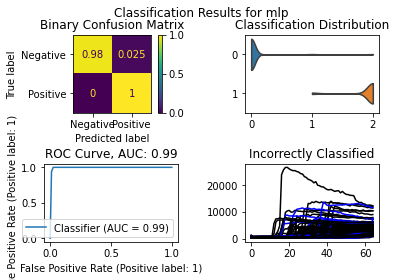

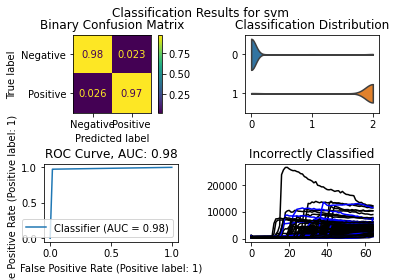

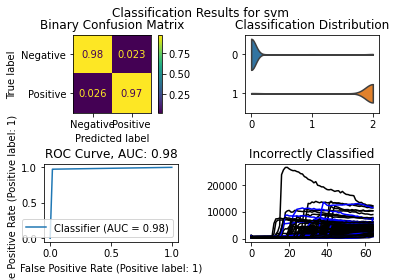

In [ ]:
ml_quic.get_model_plots(tags=['Supervised'])